# Multiple Linear Regression

This notebook runs different multiple linear regression models and collates all results into a table for easier comparison. Finally, a graph will compare the RMSE and R^2 scores for training and testing to pick the best model.

## Import the relevant libraries

In [1]:
# Needed libraries for Multiple Linear Regression #

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Suppress notebook warnings #
import warnings
warnings.filterwarnings('ignore')

# Pandas settings to avoid exponential form and display all columns #
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
%%capture

from tqdm import tqdm_notebook as tqdm
from tqdm import tnrange
tqdm().pandas()

## Load the data

In [3]:
df2 = pd.read_csv('games_df.csv')

del df2["Unnamed: 0"]
df2.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,metascore,userscore,date,years_ago,month_abbrev,month_num,months_ago,Company,Units_Sold,generation_lifespan,generation_flag,Publisher_Metascore,Publisher_Userscore,Developer_Metascore,Developer_Userscore,Genre_Metascore,Genre_Userscore
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Others,20.320,6.370,9.850,0.990,3.120,2013,97,8.300,"Sep 17, 2013",7,Sep,9,79,Sony,87.400,0.976,0.000,82.900,7.860,69.102,7.097,66.628,7.089
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Others,19.390,6.060,9.710,0.600,3.020,2014,97,8.300,"Nov 18, 2014",6,Nov,11,65,Sony,108.900,0.143,0.000,82.900,7.860,69.102,7.097,66.628,7.089
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Others,16.150,8.410,5.490,0.470,1.780,2002,95,8.800,"Oct 27, 2002",18,Oct,10,210,Sony,155.000,0.375,0.000,82.900,7.860,69.102,7.097,66.628,7.089
3,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Others,15.860,9.060,5.330,0.060,1.420,2013,97,8.300,"Sep 17, 2013",7,Sep,9,79,Microsoft,84.000,0.979,0.000,82.900,7.860,69.102,7.097,66.628,7.089
4,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,14.820,9.070,4.290,0.130,1.330,2011,88,3.400,"Nov 08, 2011",9,Nov,11,101,Microsoft,84.000,0.747,0.000,70.563,6.830,82.864,5.077,70.479,6.975
5,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,14.740,9.760,3.730,0.110,1.140,2010,87,6.400,"Nov 09, 2010",10,Nov,11,113,Microsoft,84.000,0.621,0.000,70.563,6.830,76.789,7.108,70.479,6.975
6,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Others,13.940,5.260,6.210,0.210,2.260,2018,97,7.700,"Oct 26, 2018",2,Oct,10,18,Sony,108.900,0.702,0.000,82.900,7.860,69.102,7.097,73.584,6.912
7,47,Call of Duty: Black Ops II,Shooter,M,X360,Activision,Treyarch,13.860,8.270,4.320,0.070,1.200,2012,83,5.000,"Nov 13, 2012",8,Nov,11,89,Microsoft,84.000,0.874,0.000,70.563,6.830,76.789,7.108,70.479,6.975
8,48,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,Treyarch,13.800,4.990,5.880,0.650,2.280,2012,83,5.400,"Nov 13, 2012",8,Nov,11,89,Sony,87.400,0.855,0.000,70.563,6.830,76.789,7.108,70.479,6.975
9,50,Call of Duty: Modern Warfare 2,Shooter,M,X360,Activision,Infinity Ward,13.530,8.540,3.630,0.080,1.280,2009,94,6.400,"Nov 10, 2009",11,Nov,11,125,Microsoft,84.000,0.495,0.000,70.563,6.830,82.864,5.077,70.479,6.975


In [4]:
df = pd.read_csv('game_sales_engineered.csv')

In [5]:
df.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,metascore,userscore,date,years_ago,month_abbrev,month_num,months_ago,generation_lifespan,generation_flag,Publisher_Metascore,Publisher_Userscore,Developer_Metascore,Developer_Userscore,Genre_Metascore,Genre_Userscore,Console_Company,Console_Units_Sold,rerelease
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Others,20.320,6.370,9.850,0.990,3.120,2013,97,8.300,"Sep 17, 2013",7,Sep,9,79,0.976,0.000,82.900,7.860,69.102,7.097,66.628,7.089,Sony,87.400,1
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Others,19.390,6.060,9.710,0.600,3.020,2014,97,8.300,"Nov 18, 2014",6,Nov,11,65,0.143,0.000,82.900,7.860,69.102,7.097,66.628,7.089,Sony,108.900,2
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Others,16.150,8.410,5.490,0.470,1.780,2002,95,8.800,"Oct 27, 2002",18,Oct,10,210,0.375,0.000,82.900,7.860,69.102,7.097,66.628,7.089,Sony,155.000,0
3,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Others,15.860,9.060,5.330,0.060,1.420,2013,97,8.300,"Sep 17, 2013",7,Sep,9,79,0.979,0.000,82.900,7.860,69.102,7.097,66.628,7.089,Microsoft,84.000,1
4,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,14.820,9.070,4.290,0.130,1.330,2011,88,3.400,"Nov 08, 2011",9,Nov,11,101,0.747,0.000,70.563,6.830,82.864,5.077,70.479,6.975,Microsoft,84.000,0
5,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,14.740,9.760,3.730,0.110,1.140,2010,87,6.400,"Nov 09, 2010",10,Nov,11,113,0.621,0.000,70.563,6.830,76.789,7.108,70.479,6.975,Microsoft,84.000,0
6,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Others,13.940,5.260,6.210,0.210,2.260,2018,97,7.700,"Oct 26, 2018",2,Oct,10,18,0.702,0.000,82.900,7.860,69.102,7.097,73.584,6.912,Sony,108.900,0
7,47,Call of Duty: Black Ops II,Shooter,M,X360,Activision,Treyarch,13.860,8.270,4.320,0.070,1.200,2012,83,5.000,"Nov 13, 2012",8,Nov,11,89,0.874,0.000,70.563,6.830,76.789,7.108,70.479,6.975,Microsoft,84.000,0
8,48,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,Treyarch,13.800,4.990,5.880,0.650,2.280,2012,83,5.400,"Nov 13, 2012",8,Nov,11,89,0.855,0.000,70.563,6.830,76.789,7.108,70.479,6.975,Sony,87.400,0
9,50,Call of Duty: Modern Warfare 2,Shooter,M,X360,Activision,Infinity Ward,13.530,8.540,3.630,0.080,1.280,2009,94,6.400,"Nov 10, 2009",11,Nov,11,125,0.495,0.000,70.563,6.830,82.864,5.077,70.479,6.975,Microsoft,84.000,0


In [6]:
df.shape

(6242, 31)

In [7]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'generation_lifespan',
       'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore',
       'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore',
       'Genre_Userscore', 'Console_Company', 'Console_Units_Sold',
       'rerelease'],
      dtype='object')

## Manage Categorical Variables

Below assigns all categorical variables into dummy variables.

In [8]:
categorical = df[['Genre','ESRB_Rating','Console_Company','Publisher']]

In [9]:
categorical_df = pd.get_dummies(data=categorical, drop_first=True)

In [10]:
categorical_df.describe()

,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Others,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_RP,ESRB_Rating_T,Console_Company_Nintendo,Console_Company_PC,Console_Company_Sega,Console_Company_Sony,Publisher_2K Sports,Publisher_505 Games,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Atari,Publisher_Atlus,Publisher_Bethesda Softworks,Publisher_Capcom,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_EA Sports BIG,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_KOEI,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Others,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sierra Entertainment,Publisher_Sony Computer Entertainment,Publisher_Sony Interactive Entertainment,Publisher_SouthPeak Interactive,Publisher_Square Enix,Publisher_THQ,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_VU Games,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Xseed Games
count,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000,6242.000
mean,0.018,0.059,0.054,0.049,0.011,0.060,0.021,0.079,0.104,0.130,0.043,0.145,0.042,0.132,0.219,0.002,0.355,0.258,0.079,0.002,0.417,0.015,0.008,0.011,0.066,0.004,0.005,0.020,0.021,0.011,0.033,0.015,0.006,0.008,0.008,0.055,0.006,0.018,0.074,0.010,0.033,0.008,0.013,0.009,0.011,0.006,0.017,0.013,0.013,0.015,0.009,0.027,0.148,0.011,0.044,0.006,0.039,0.004,0.004,0.017,0.039,0.004,0.010,0.063,0.008,0.010,0.008,0.007
std,0.133,0.236,0.225,0.216,0.106,0.237,0.144,0.269,0.306,0.336,0.202,0.352,0.200,0.338,0.413,0.044,0.479,0.438,0.269,0.044,0.493,0.122,0.086,0.104,0.248,0.063,0.071,0.140,0.143,0.103,0.179,0.122,0.075,0.087,0.088,0.228,0.080,0.132,0.261,0.098,0.179,0.086,0.115,0.097,0.104,0.075,0.128,0.115,0.112,0.123,0.093,0.162,0.355,0.105,0.205,0.077,0.193,0.064,0.063,0.128,0.193,0.066,0.100,0.243,0.092,0.099,0.088,0.086
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

## Declare the dependent and independent variables

Initial setup of the variables before standardization.

In [11]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'generation_lifespan',
       'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore',
       'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore',
       'Genre_Userscore', 'Console_Company', 'Console_Units_Sold',
       'rerelease'],
      dtype='object')

In [12]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'Publisher_Metascore',
       'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore',
       'Genre_Metascore', 'Genre_Userscore', 'rerelease']]
categorical = df[['Genre','ESRB_Rating','Console_Company','Publisher']]
categorical_df = pd.get_dummies(data=categorical, drop_first=True)
#features = pd.concat([features, categorical], axis=1)

## Standardization / Scaling and Comparing Weights

Standardization / scaling of all applicable variables to be able to compare weights and check which ones are significant to predicit Global Sales

In [13]:
scaler = StandardScaler()

In [14]:
# Appends all column names to be scaled #
features_scaled = []
for var in features:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    features_scaled.append(new_col)

In [15]:
# Checks columns names of the features to be scaled #
features_scaled

['metascore_scaled',
 'userscore_scaled',
 'years_ago_scaled',
 'generation_lifespan_scaled',
 'generation_flag_scaled',
 'Console_Units_Sold_scaled',
 'Publisher_Metascore_scaled',
 'Publisher_Userscore_scaled',
 'Developer_Metascore_scaled',
 'Developer_Userscore_scaled',
 'Genre_Metascore_scaled',
 'Genre_Userscore_scaled',
 'rerelease_scaled']

In [16]:
# Assigns categorical features to dummy variables #
categorical = df[['Genre','ESRB_Rating','Console_Company','Publisher']]
categorical_df = pd.get_dummies(data=categorical, drop_first=True)

Approach 1 to categorical variables: The model below will show all the weights of the features including dummy variables.

In [17]:
fit = ols('Global_Sales ~ metascore_scaled + userscore_scaled + years_ago_scaled + generation_lifespan_scaled + generation_flag_scaled + Console_Units_Sold + rerelease + C(Genre) + C(ESRB_Rating) + C(Console_Company) + C(Publisher)', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     28.50
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        04:45:45   Log-Likelihood:                -9185.3
No. Observations:                6242   AIC:                         1.852e+04
Df Residuals:                    6166   BIC:                         1.903e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.3208      0.139      2.316      0.021       0.049       0.592
C(Genre)[T.Action-Adventure]                               0.0405      0.110      0.370      0.711      -0.174       0.255
C(Genre)[T.Adventure]                                     -0.1933      0.065     -2.975      0.003      -0.321      -0.066
C(Genre)[T.Fighting]                                       0.0095      0.070      0.135      0.892      -0.128       0.147
C(Genre)[T.Misc]                                          -0.0063      0.072     -0.088      0.930      -0.147       0.134
C(Genre)[T.Others]                                        -0.2270      0.134     -1.690      0.091      -0.490       0.036
C(Genre)[T.Platform]                                      -0.0682      0.069     -0.988      0.323      -0.204       0.067
C(Genre)[T.Puzzle]                                        -0.3402      0.105     -3.255      0.001      -0.545      -0.135
C(Genre)[T.Racing]                                        -0.1366      0.065     -2.100      0.036      -0.264      -0.009
C(Genre)[T.Role-Playing]                                  -0.0794      0.058     -1.372      0.170      -0.193       0.034
C(Genre)[T.Shooter]                                        0.0554      0.051      1.076      0.282      -0.045       0.156
C(Genre)[T.Simulation]                                    -0.0008      0.077     -0.010      0.992      -0.151       0.150
C(Genre)[T.Sports]                                        -0.1754      0.066     -2.654      0.008      -0.305      -0.046
C(Genre)[T.Strategy]                                      -0.2089      0.077     -2.699      0.007      -0.361      -0.057
C(ESRB_Rating)[T.E10]                                     -0.1743      0.051     -3.419      0.001      -0.274      -0.074
C(ESRB_Rating)[T.M]                                        0.1971      0.056      3.534      0.000       0.088       0.306
C(ESRB_Rating)[T.RP]                                      -0.2381      0.312     -0.763      0.445      -0.850       0.373
C(ESRB_Rating)[T.T]                                       -0.0932      0.045     -2.080      0.038      -0.181      -0.005
C(Console_Company)[T.Nintendo]                            -0.0633      0.046     -1.382      0.167      -0.153       0.026
C(Console_Company)[T.PC]                                  -0.6347      0.097     -6.551      0.000      -0.825      -0.445
C(Console_Company)[T.Sega]                                -0.1494      0.323     -0.463      0.643      -0.782       0.483
C(Console_Company)[T.Sony]                                 0.0820      0.043      1.905      0.057      -0.002       0.166
C(Publis

Approach 2 to categorical variables: The model below will show all the weights of the features including aggregated categorical variables. They were aggregated through getting the means of the categorical values.

In [18]:
fit = ols('Global_Sales ~ metascore_scaled + userscore_scaled + years_ago_scaled + generation_lifespan_scaled + generation_flag_scaled + rerelease_scaled + Console_Units_Sold_scaled + Publisher_Metascore_scaled + Publisher_Userscore_scaled + Developer_Metascore_scaled + Developer_Userscore_scaled + Genre_Metascore_scaled + Genre_Userscore_scaled', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          2.40e-287
Time:                        04:45:46   Log-Likelihood:                -9422.9
No. Observations:                6242   AIC:                         1.887e+04
Df Residuals:                    6228   BIC:                         1.897e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.6422      0.014     46.291      0.000       0.615       0.669
metascore_scaled               0.4547      0.019     23.987      0.000       0.418       0.492
userscore_scaled              -0.1621      0.018     -8.803      0.000      -0.198      -0.126
years_ago_scaled              -0.0901      0.015     -5.841      0.000      -0.120      -0.060
generation_lifespan_scaled    -0.0237      0.014     -1.674      0.094      -0.051       0.004
generation_flag_scaled        -0.1909      0.015    -13.083      0.000      -0.220      -0.162
rerelease_scaled               0.0460      0.014      3.249      0.001       0.018       0.074
Console_Units_Sold_scaled      0.1300      0.014      9.147      0.000       0.102       0.158
Publisher_Metascore_scaled     0.1494      0.017      8.600      0.000       0.115       0.184
Publisher_Userscore_scaled     0.0187      0.016      1.149      0.250      -0.013       0.051
Developer_Metascore_scaled     0.0826      0.017      4.858      0.000       0.049       0.116
Developer_Userscore_scaled    -0.1513      0.015     -9.994      0.000      -0.181      -0.122
Genre_Metascore_scaled        -0.1401      0.015     -9.078      0.000      -0.170      -0.110
Genre_Userscore_scaled        -0.0477      0.015     -3.255      0.001      -0.076      -0.019
==============================================================================
Omnibus:                     7101.236   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           896391.212
Skew:                           5.816   Prob(JB):                         0.00
Kurtosis:                      60.544   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lasso to check which features are significant

In [19]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore', 'Console_Units_Sold']]

# Run lasso on the variables above #
lasso = Lasso(alpha = 0.05).fit(features,target)
lasso.coef_

array([ 0.03146281, -0.10337311, -0.00998021, -0.        , -0.09317647,
        0.04284662, -0.        ,  0.01259312, -0.        , -0.03645773,
       -0.        ,  0.00307702])

## Functions for reuse

In [20]:
def run_regression(target, features, degree, ridge, elastic, gradientboost):
    
    '''
    This function automatically runs a multiple regression test based on the
    inputted target and features. This automatically splits train and test 
    data. The function also automatically does polynomial regression based
    on degree inputted. This also automatically does Ridge Regression if set
    to True. This function can output the following values based on the test:
    
    - Coefficients and Intercept values
    - P values
    - R2 score for test and train data
    - Adjusted R2 score for test and train data
    - Different error metrics: MAE, MSE and RMSE
    - Cross-validation score
    
    Parameters: 
        Target: The dependent variable that the user wishes to predict
        Features: The independent variables to be used to predict target
        Degree: Degree by which to run Polynomial Regression
        Ridge: True or False; whether to run Ridge
        Elastic: True or False; whether to run Elastic
        Gradient Boost: True or False; whether to run Gradient Boost
          
    Returns: 
        This returns a dictionary of the values discussed above
    
    '''
    if degree > 0:

        if ridge == True:
    
            ### Train, Test Split of all observations ###
            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=321,test_size=0.2)


            ### Polynomial regression ###
            poly = PolynomialFeatures(degree=degree)
            X_train = poly.fit_transform(X_train)
            X_test = poly.fit_transform(X_test)

                        ### Run Ridge ###
            alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

            ridge = Ridge()

            parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

            ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
            ridge_regressor.fit(X_train, y_train)
            ridge_regressor.best_params_
            
            lr_ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'], normalize = True, max_iter= 1000)

            
            ### Run linear regression on the training data ###
            reg = LinearRegression()
            lr_ridge.fit(X_train,y_train)
            coef_train = lr_ridge.coef_
            intercept_train = lr_ridge.intercept_
            p_values = f_regression(X_train,y_train)[1]

            ### Get r2 and adjusted r2 score of training ###
            r2_train = lr_ridge.score(X_train, y_train)

            n = X_train.shape[0]
            p = X_train.shape[1]
            adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

            ### Get error values for training ###
            y_train_pred = lr_ridge.predict(X_train)

            train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
            train_mse = metrics.mean_squared_error(y_train, y_train_pred)
            train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

            ### Run linear regression on the testing data ###
            lr_ridge.score(X_test, y_test)

            ### Get r2 and adjusted r2 score of testing ###
            r2_test = lr_ridge.score(X_test, y_test)
            n = X_test.shape[0]
            p = X_test.shape[1]

            adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

            ### Get error values for testing ###
            y_test_pred = lr_ridge.predict(X_test)

            test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
            test_mse = metrics.mean_squared_error(y_test, y_test_pred)
            test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

            ### Get five-fold cross-validation score ###
            cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

            return {'coef_train': coef_train, 'intercept_train': intercept_train, 'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}
        
        elif elastic == True:
    
            ### Train, Test Split of all observations ###
            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=321,test_size=0.2)


            ### Polynomial regression ###
            poly = PolynomialFeatures(degree=degree)
            X_train = poly.fit_transform(X_train)
            X_test = poly.fit_transform(X_test)

            ### Run elastic ###

            elastic = ElasticNetCV(eps = None, n_alphas = None, 
                                               alphas=[0.1, 1.0, 10.0], 
                                               l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                                               cv=5)

            
            ### Run linear regression on the training data ###
            reg = LinearRegression()
            elastic.fit(X_train,y_train)
            coef_train = elastic.coef_
            intercept_train = elastic.intercept_
            p_values = f_regression(X_train,y_train)[1]

            ### Get r2 and adjusted r2 score of training ###
            r2_train = elastic.score(X_train, y_train)

            n = X_train.shape[0]
            p = X_train.shape[1]
            adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

            ### Get error values for training ###
            y_train_pred = elastic.predict(X_train)

            train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
            train_mse = metrics.mean_squared_error(y_train, y_train_pred)
            train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

            ### Run linear regression on the testing data ###
            elastic.score(X_test, y_test)

            ### Get r2 and adjusted r2 score of testing ###
            r2_test = elastic.score(X_test, y_test)
            n = X_test.shape[0]
            p = X_test.shape[1]

            adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

            ### Get error values for testing ###
            y_test_pred = elastic.predict(X_test)

            test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
            test_mse = metrics.mean_squared_error(y_test, y_test_pred)
            test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

            ### Get five-fold cross-validation score ###
            cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

            return {'coef_train': coef_train, 'intercept_train': intercept_train, 'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}
  
        elif gradientboost == True:
    
            ### Train, Test Split of all observations ###
            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=321,test_size=0.2)


            ### Polynomial regression ###
            poly = PolynomialFeatures(degree=degree)
            X_train = poly.fit_transform(X_train)
            X_test = poly.fit_transform(X_test)

            ### Run gradient boost ###
            
            # Loss function to be optimized
            loss = ["ls", "lad", "huber"]

            # Maximum depth of each tree
            max_depth = [2, 3, 5, 10, 15]

            # Minimum number of samples per leaf
            min_samples_leaf = [1, 2, 4, 6, 8]

            # Minimum number of samples to split a node
            min_samples_split = [2, 4, 6, 10]

            # Maximum number of features to consider for making splits
            max_features = ["auto", "sqrt", "log2", None]
            
            hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

            model = GradientBoostingRegressor(random_state = 321)

            random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)
            random_cv.fit(X_train, y_train)
            
            trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

            model = random_cv.best_estimator_
            grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=4, 
                                       scoring="neg_mean_absolute_error", verbose=1,
                                       n_jobs=-1, return_train_score=True)
            
            ### Run linear regression on the training data ###
            reg = LinearRegression()
            grid_search.fit(X_train, y_train)
            #coef_train = grid_search.coef_
            #intercept_train = grid_search.intercept_
            p_values = f_regression(X_train,y_train)[1]

            ### Get r2 and adjusted r2 score of training ###
            r2_train = grid_search.score(X_train, y_train)

            n = X_train.shape[0]
            p = X_train.shape[1]
            adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

            ### Get error values for training ###
            y_train_pred = grid_search.predict(X_train)

            train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
            train_mse = metrics.mean_squared_error(y_train, y_train_pred)
            train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

            ### Run linear regression on the testing data ###
            grid_search.score(X_test, y_test)

            ### Get r2 and adjusted r2 score of testing ###
            r2_test = grid_search.score(X_test, y_test)
            n = X_test.shape[0]
            p = X_test.shape[1]

            adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

            ### Get error values for testing ###
            y_test_pred = grid_search.predict(X_test)

            test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
            test_mse = metrics.mean_squared_error(y_test, y_test_pred)
            test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

            ### Get five-fold cross-validation score ###
            cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

            return {'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}
          
        else:
            ### Train, Test Split of all observations ###
            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=321,test_size=0.2)


            ### Polynomial regression ###
            poly = PolynomialFeatures(degree=degree)
            X_train = poly.fit_transform(X_train)
            X_test = poly.fit_transform(X_test)

            ### Run linear regression on the training data ###
            reg = LinearRegression()
            reg.fit(X_train,y_train)
            coef_train = reg.coef_
            intercept_train = reg.intercept_
            p_values = f_regression(X_train,y_train)[1]

            ### Get r2 and adjusted r2 score of training ###
            r2_train = reg.score(X_train, y_train)

            n = X_train.shape[0]
            p = X_train.shape[1]
            adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

            ### Get error values for training ###
            y_train_pred = reg.predict(X_train)

            train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
            train_mse = metrics.mean_squared_error(y_train, y_train_pred)
            train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

            ### Run linear regression on the testing data ###
            reg.score(X_test, y_test)

            ### Get r2 and adjusted r2 score of testing ###
            r2_test = reg.score(X_test, y_test)
            n = X_test.shape[0]
            p = X_test.shape[1]

            adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

            ### Get error values for testing ###
            y_test_pred = reg.predict(X_test)

            test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
            test_mse = metrics.mean_squared_error(y_test, y_test_pred)
            test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

            ### Get five-fold cross-validation score ###
            cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

            return {'coef_train': coef_train, 'intercept_train': intercept_train, 'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}
    
    else:
    
        
        if gradientboost == True:
    
            ### Train, Test Split of all observations ###
            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=321,test_size=0.2)

            ### Run gradient boost ###
            
            # Loss function to be optimized
            loss = ["ls", "lad", "huber"]

            # Maximum depth of each tree
            max_depth = [2, 3, 5, 10, 15]

            # Minimum number of samples per leaf
            min_samples_leaf = [1, 2, 4, 6, 8]

            # Minimum number of samples to split a node
            min_samples_split = [2, 4, 6, 10]

            # Maximum number of features to consider for making splits
            max_features = ["auto", "sqrt", "log2", None]
            
            hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

            model = GradientBoostingRegressor(random_state = 321)

            random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)
            random_cv.fit(X_train, y_train)
            
            trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

            model = random_cv.best_estimator_
            grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=4, 
                                       scoring="neg_mean_absolute_error", verbose=1,
                                       n_jobs=-1, return_train_score=True)
            
            ### Run linear regression on the training data ###
            reg = LinearRegression()
            grid_search.fit(X_train, y_train)
            #coef_train = grid_search.coef_
            #intercept_train = grid_search.intercept_
            p_values = f_regression(X_train,y_train)[1]

            ### Get r2 and adjusted r2 score of training ###
            r2_train = grid_search.score(X_train, y_train)

            n = X_train.shape[0]
            p = X_train.shape[1]
            adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

            ### Get error values for training ###
            y_train_pred = grid_search.predict(X_train)

            train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
            train_mse = metrics.mean_squared_error(y_train, y_train_pred)
            train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

            ### Run linear regression on the testing data ###
            grid_search.score(X_test, y_test)

            ### Get r2 and adjusted r2 score of testing ###
            r2_test = grid_search.score(X_test, y_test)
            n = X_test.shape[0]
            p = X_test.shape[1]

            adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

            ### Get error values for testing ###
            y_test_pred = grid_search.predict(X_test)

            test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
            test_mse = metrics.mean_squared_error(y_test, y_test_pred)
            test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

            ### Get five-fold cross-validation score ###
            cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

            return {'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}

        
        else:

            ### Train, Test Split of all observations ###
            X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=321,test_size=0.2)

            ### Run Ridge ###
            alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

            ridge = Ridge()

            parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

            ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
            ridge_regressor.fit(X_train, y_train)
            ridge_regressor.best_params_
            
            lr_ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'], normalize = True, max_iter= 1000)

            
            ### Run linear regression on the training data ###
            reg = LinearRegression()
            lr_ridge.fit(X_train,y_train)
            coef_train = lr_ridge.coef_
            intercept_train = lr_ridge.intercept_
            p_values = f_regression(X_train,y_train)[1]

            ### Get r2 and adjusted r2 score of training ###
            r2_train = lr_ridge.score(X_train, y_train)

            n = X_train.shape[0]
            p = X_train.shape[1]
            adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

            ### Get error values for training ###
            y_train_pred = lr_ridge.predict(X_train)

            train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
            train_mse = metrics.mean_squared_error(y_train, y_train_pred)
            train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

            ### Run linear regression on the testing data ###
            lr_ridge.score(X_test, y_test)

            ### Get r2 and adjusted r2 score of testing ###
            r2_test = lr_ridge.score(X_test, y_test)
            n = X_test.shape[0]
            p = X_test.shape[1]

            adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

            ### Get error values for testing ###
            y_test_pred = lr_ridge.predict(X_test)

            test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
            test_mse = metrics.mean_squared_error(y_test, y_test_pred)
            test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

            ### Get five-fold cross-validation score ###
            cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

            return {'coef_train': coef_train, 'intercept_train': intercept_train, 'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}

## Create summary table

This table will be useful when comparing multiple models.

In [21]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


## Multiple Linear Regression Models

### Multiple Regression - 1

**Model**: all features plus dummy data for all categorical variables

#### Set Target and Features

In [22]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease']]
categorical = df[['Genre','ESRB_Rating','Console_Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [23]:
result = run_regression(target, features, 0, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

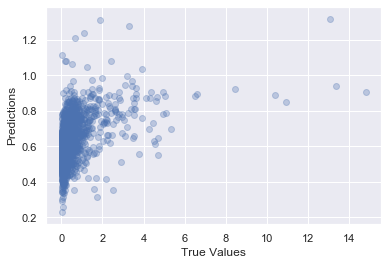

In [24]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

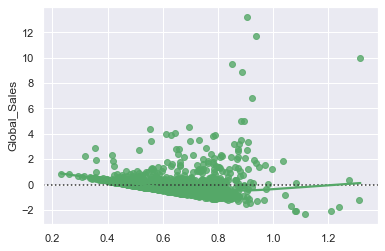

In [25]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

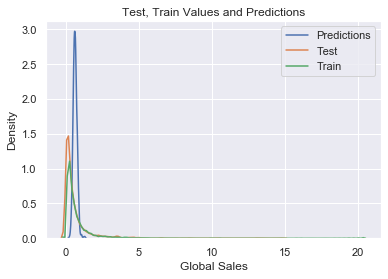

In [26]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [27]:
summary_df = summary_df.append({'Model' : 'Model 1', 'Description' : 'All features, dummy data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043


### Multiple Regression - 2

**Model**: All features with aggregated categorical features (via their means)

#### Set Target and Features

In [28]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [29]:
result = run_regression(target, features, 0, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

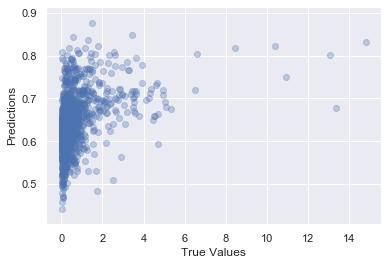

In [30]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

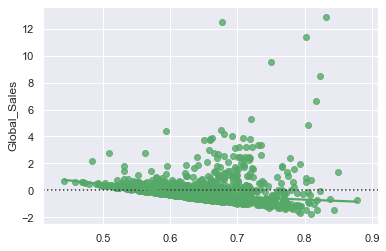

In [31]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

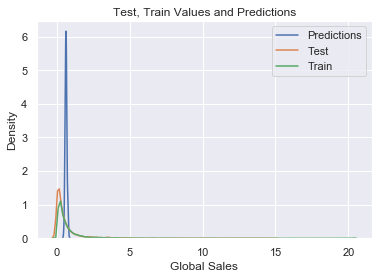

In [32]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [33]:
summary_df = summary_df.append({'Model' : 'Model 2', 'Description' : 'All features, aggregated categorical data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045


### Multiple Regression - 3

**Model**: Features based on Lasso results with aggregated categorical features (via their means)

#### Set Target and Features

In [34]:
target = df['Global_Sales']
features = df[['metascore','years_ago', 'generation_lifespan', 'Console_Units_Sold', 'rerelease','Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [35]:
result = run_regression(target, features, 0, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

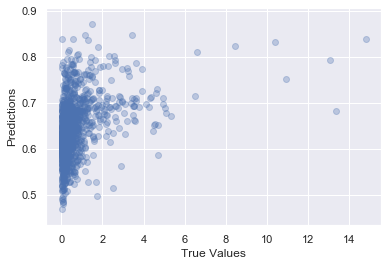

In [36]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

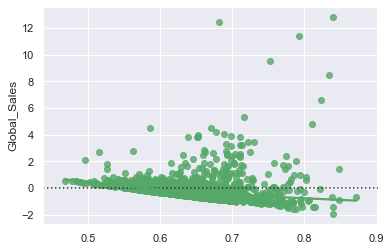

In [37]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

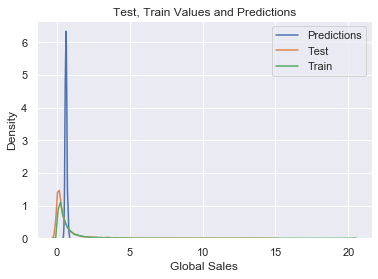

In [38]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [39]:
summary_df = summary_df.append({'Model' : 'Model 3', 'Description' : 'Features based on Lasso, aggregated categorical data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365


### Multiple Regression - 4

**Model**: All features with dummy categorical data, polynomial 1st degree

#### Set Target and Features

In [40]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease']]
categorical = df[['Genre','ESRB_Rating','Console_Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [41]:
result = run_regression(target, features, 1, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

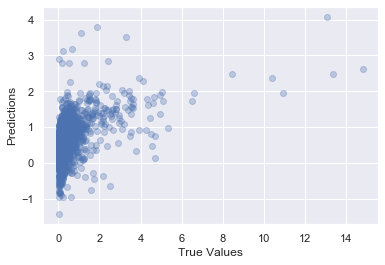

In [42]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

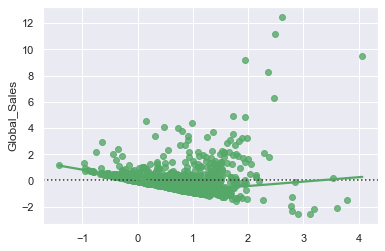

In [43]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

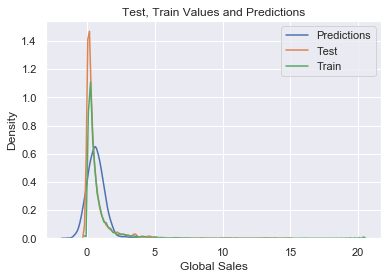

In [44]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [45]:
summary_df = summary_df.append({'Model' : 'Model 4', 'Description' : 'All features, dummy data, polynomial 1st degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043


### Multiple Regression - 5

**Model**: All features with dummy categorical features, polynomial 2nd degree

#### Set Target and Features

In [46]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease']]
categorical = df[['Genre','ESRB_Rating','Console_Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [47]:
result = run_regression(target, features, 2, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

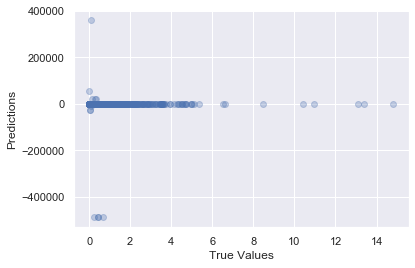

In [48]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

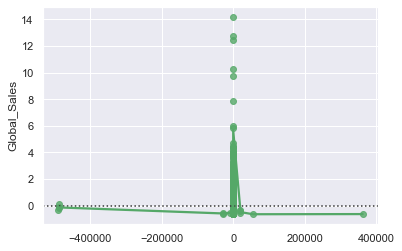

In [49]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

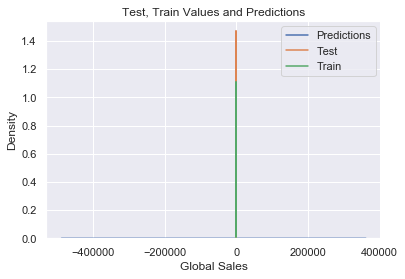

In [50]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [51]:
summary_df = summary_df.append({'Model' : 'Model 5', 'Description' : 'All features, dummy data, polynomial 2md degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043


### Multiple Regression - 6 (all features, aggregated categorical data, polynomial 1st degree)

**Model**: All features with aggregated categorical data (via their means), polynomial 1st degree

#### Set Target and Features

In [52]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore', 'rerelease']]

#### Run regression

In [53]:
result = run_regression(target, features, 1, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

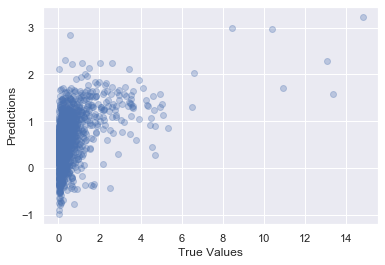

In [54]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

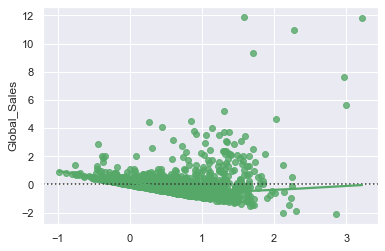

In [55]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

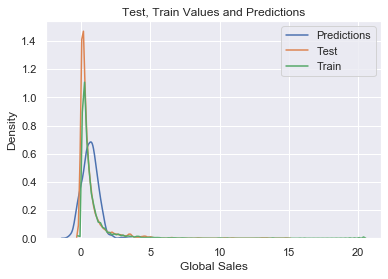

In [56]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [57]:
summary_df = summary_df.append({'Model' : 'Model 6', 'Description' : 'All features, aggregated categorical data, polynomial 1st degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045


### Multiple Regression - 7

**Model**: All features with aggregated categorical data (via their means), polynomial 2nd degree

#### Set Target and Features

In [58]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [59]:
result = run_regression(target, features, 2, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

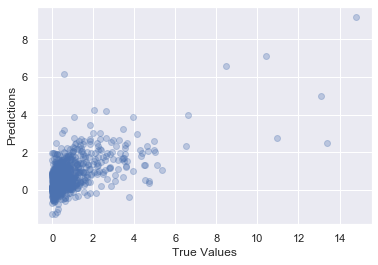

In [60]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

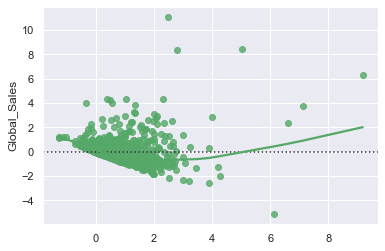

In [61]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

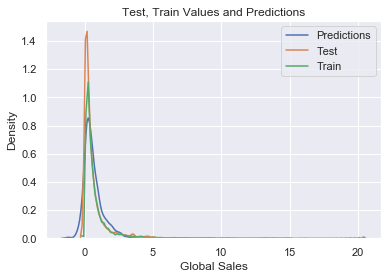

In [62]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [63]:
summary_df = summary_df.append({'Model' : 'Model 7', 'Description' : 'All features, aggregated categorical data, polynomial 2md degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045


### Multiple Regression - 8

**Model**: Basic features plus basic aggregated categorical data

#### Set Target and Features

In [64]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'Console_Units_Sold']]
categorical = df[['Genre','ESRB_Rating','Console_Company']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [65]:
result = run_regression(target, features, 0, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

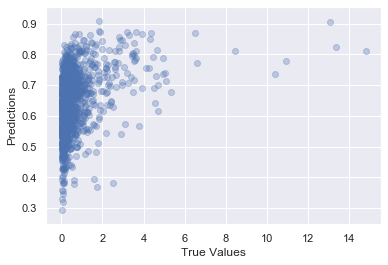

In [66]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

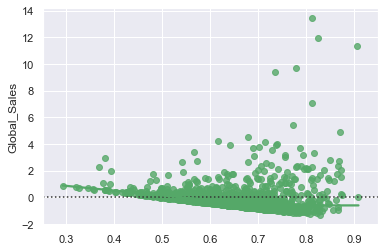

In [67]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

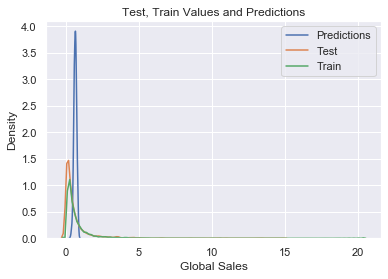

In [68]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [69]:
summary_df = summary_df.append({'Model' : 'Model 8', 'Description' : 'Basic features, basic aggregated categorical data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369


### Multiple Regression - 9

**Model**: metascore, userscore and console units sold only

#### Set Target and Features

In [70]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'Console_Units_Sold']]

#### Run regression

In [71]:
result = run_regression(target, features, 0, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

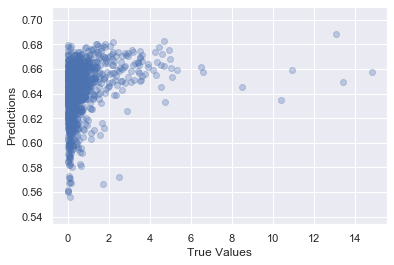

In [72]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

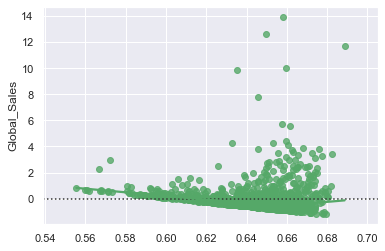

In [73]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

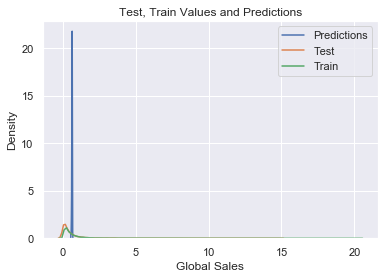

In [74]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [75]:
summary_df = summary_df.append({'Model' : 'Model 9', 'Description' : 'metascore and userscore only' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282


### Multiple Regression - 10

**Model**: Basic features, basic aggregated categorical data, polynomial 1st degree

#### Set Target and Features

In [76]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'Console_Units_Sold']]
categorical = df[['Genre','ESRB_Rating','Console_Company']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [77]:
result = run_regression(target, features, 1, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

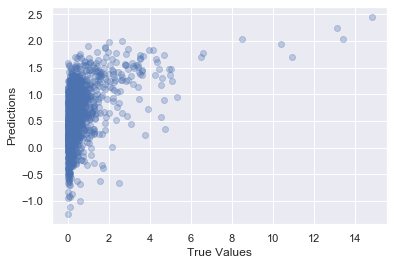

In [78]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

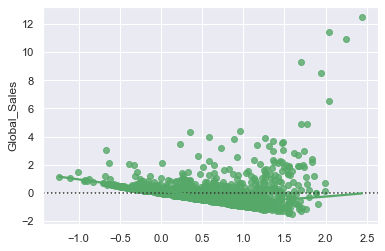

In [79]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

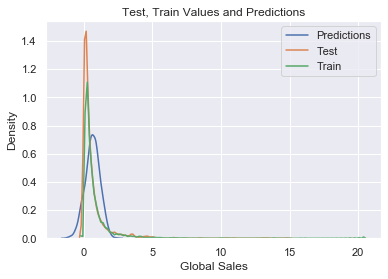

In [80]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [81]:
summary_df = summary_df.append({'Model' : 'Model 10', 'Description' : 'Basic features, basic aggregated categorical data, polynomial 1st degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 11 

**Model**: Basic features, basic aggregated categorical data, polynomial 1st degree

#### Set Target and Features

In [82]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'Console_Units_Sold']]
categorical = df[['Genre','ESRB_Rating','Console_Company']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [83]:
result = run_regression(target, features, 2, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

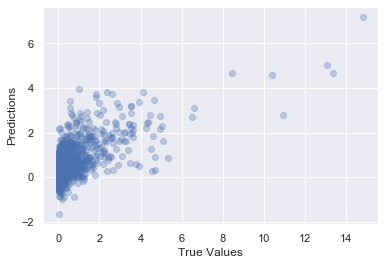

In [84]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

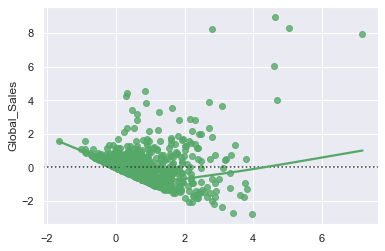

In [85]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

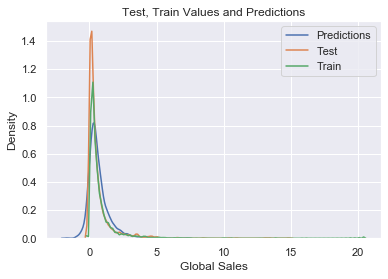

In [86]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [87]:
summary_df = summary_df.append({'Model' : 'Model 11', 'Description' : 'Basic features, basic aggregated categorical data, polynomial 2nd degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 12 

**Model**: Selected features, aggregated categorical data, polynomial 2nd degree

#### Set Target and Features

In [88]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'Console_Units_Sold', 'rerelease', 'Publisher_Metascore', 'Developer_Metascore', 'Genre_Metascore']]

#### Run regression

In [89]:
result = run_regression(target, features, 2, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

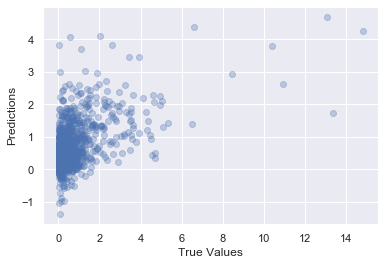

In [90]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

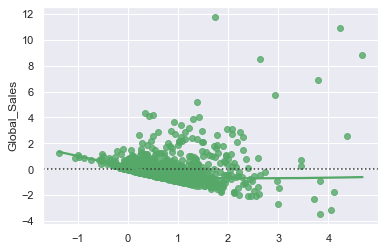

In [91]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

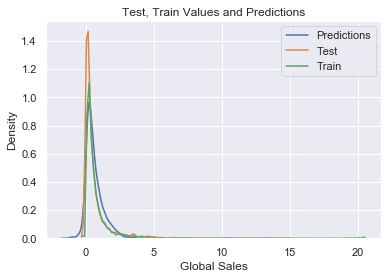

In [92]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [93]:
summary_df = summary_df.append({'Model' : 'Model 12', 'Description' : 'Selected features, aggregated categorical data, polynomial 2md degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 13 

**Model**: all features, aggregated categorical data, polynomial 3rd degree

#### Set Target and Features

In [94]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease','Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [95]:
result = run_regression(target, features, 3, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

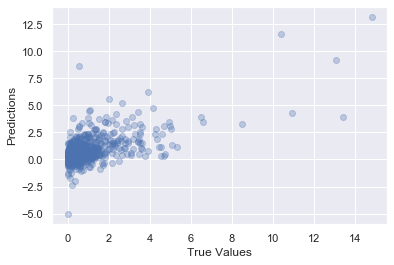

In [96]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

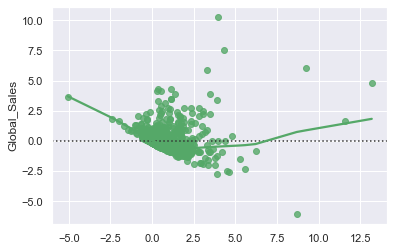

In [97]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

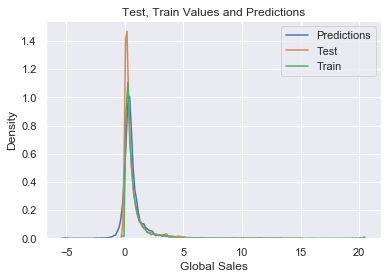

In [98]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [99]:
summary_df = summary_df.append({'Model' : 'Model 13', 'Description' : 'All features, aggregated categorical data, polynomial 3rd degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 14

**Model**: All features, aggregated categorical data, polynomial 4th degree

#### Set Target and Features

In [100]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [101]:
result = run_regression(target, features, 4, False, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

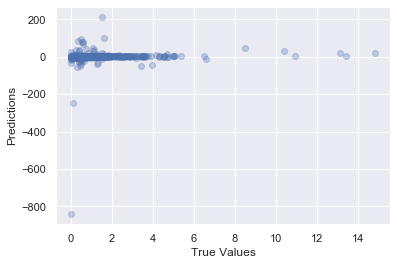

In [102]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

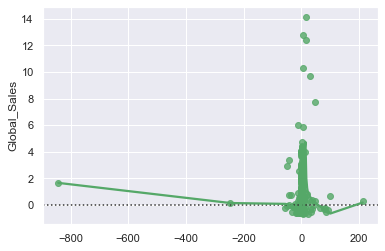

In [103]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

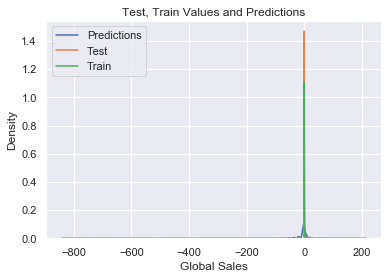

In [104]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [105]:
summary_df = summary_df.append({'Model' : 'Model 14', 'Description' : 'All features, aggregated categorical data, polynomial 4th degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 15 

**Model**: All features, aggregated categorical data, polynomial 4th degree with Ridge

#### Set Target and Features

In [106]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [107]:
result = run_regression(target, features, 4, True, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

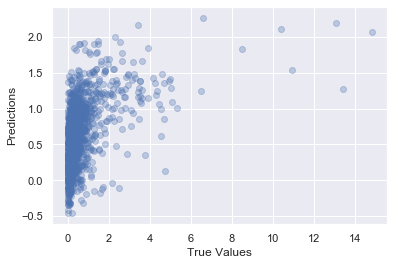

In [108]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

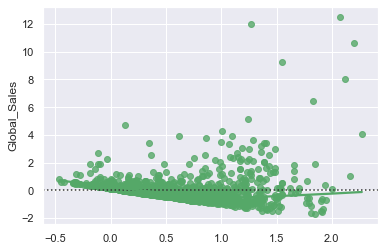

In [109]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

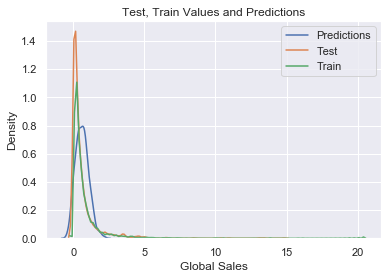

In [110]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [111]:
summary_df = summary_df.append({'Model' : 'Model 15', 'Description' : 'All features, aggregated categorical data, polynomial 4th degree, ridge' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 16 

**Model**: All features, aggregated categorical data, polynomial 3rd degree with Ridge

#### Set Target and Features

In [112]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease','Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [113]:
result = run_regression(target, features, 0, True, False, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

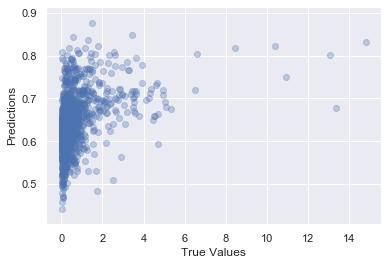

In [114]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

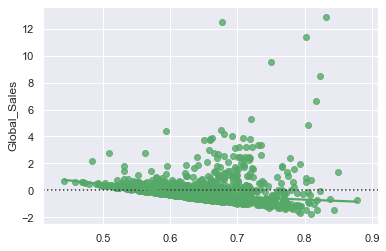

In [115]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

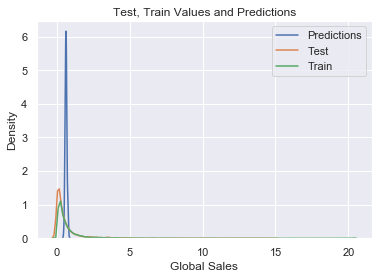

In [116]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [117]:
summary_df = summary_df.append({'Model' : 'Model 16', 'Description' : 'All features, aggregated categorical data, polynomial 4th degree, ridge' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 17

**Model**: All features, aggregated categorical data, polynomial 3rd degree

#### Set Target and Features

In [118]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease','Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [119]:
result = run_regression(target, features, 3, False, True, False)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

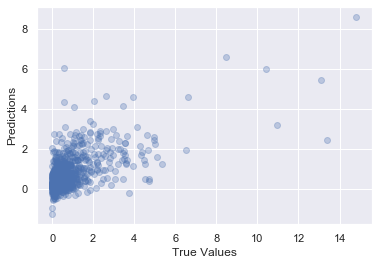

In [120]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

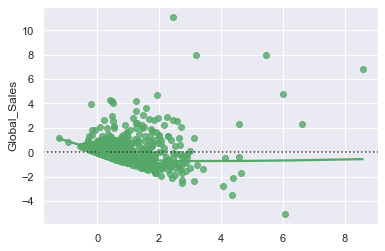

In [121]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

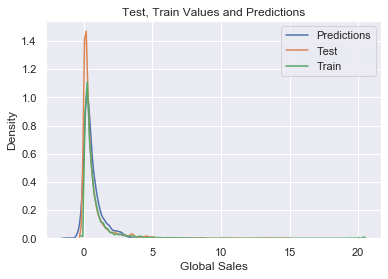

In [122]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [123]:
summary_df = summary_df.append({'Model' : 'Model 17', 'Description' : 'All features, aggregated categorical data, polynomial 3rd degree, elastic' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 18 

**Model**: All features, aggregated categorical data, polynomial 3rd degree, gradient boost

#### Set Target and Features

In [124]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease','Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [125]:
result = run_regression(target, features, 3, False, False, True)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  6.6min finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   40.5s finished


#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

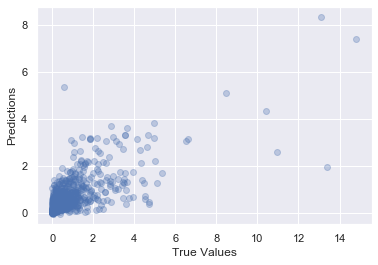

In [126]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

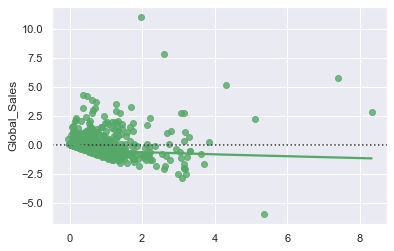

In [127]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

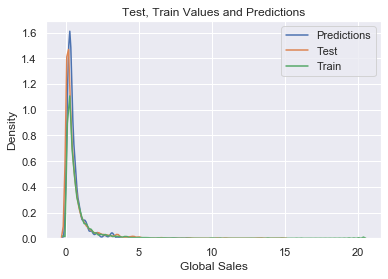

In [128]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [129]:
summary_df = summary_df.append({'Model' : 'Model 18', 'Description' : 'All features, aggregated categorical data, polynomial 3rd degree, gradient boost' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


### Multiple Regression - 19 

**Model**: All features, aggregated categorical data, gradient boost

#### Set Target and Features

In [130]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Console_Units_Sold', 'rerelease','Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [131]:
result = run_regression(target, features, 0, False, False, True)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   43.9s finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished


#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

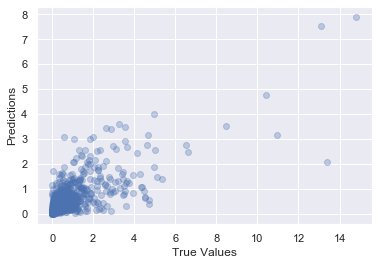

In [132]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

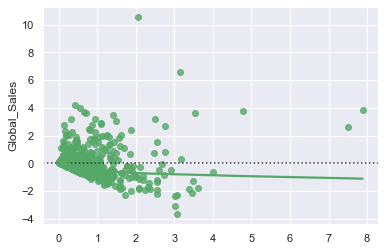

In [133]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

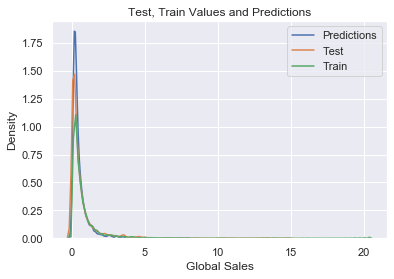

In [134]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [135]:
summary_df = summary_df.append({'Model' : 'Model 19', 'Description' : 'All features, aggregated categorical data, gradient boost' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.178,0.094,0.080,0.086,0.028,-256.043
1,Model 2,"All features, aggregated categorical data",1.213,0.039,0.036,0.040,0.030,-263.045
2,Model 3,"Features based on Lasso, aggregated categorica...",1.214,0.036,0.034,0.038,0.029,-295.365
3,Model 4,"All features, dummy data, polynomial 1st degree",1.061,0.264,0.253,0.219,0.169,-256.043
4,Model 5,"All features, dummy data, polynomial 2md degree",0.740,0.642,0.135,-638959967.485,475221717.728,-256.043
5,Model 6,"All features, aggregated categorical data, pol...",1.108,0.197,0.195,0.203,0.194,-263.045
6,Model 7,"All features, aggregated categorical data, pol...",0.953,0.406,0.394,0.396,0.340,-263.045
7,Model 8,"Basic features, basic aggregated categorical data",1.203,0.054,0.049,0.054,0.035,-279.369
8,Model 9,metascore and userscore only,1.231,0.010,0.009,0.009,0.007,-325.282
9,Model 10,"Basic features, basic aggregated categorical d...",1.117,0.185,0.181,0.188,0.171,-279.369


## Choosing best model

Based on the graph below, the best model to predict Global Sales is Model 17 because it has the lowest RMSE with the highest and similar R^2 values for training and testing.

In [138]:
summary = summary_df.drop(4)
summary = summary.drop(13)

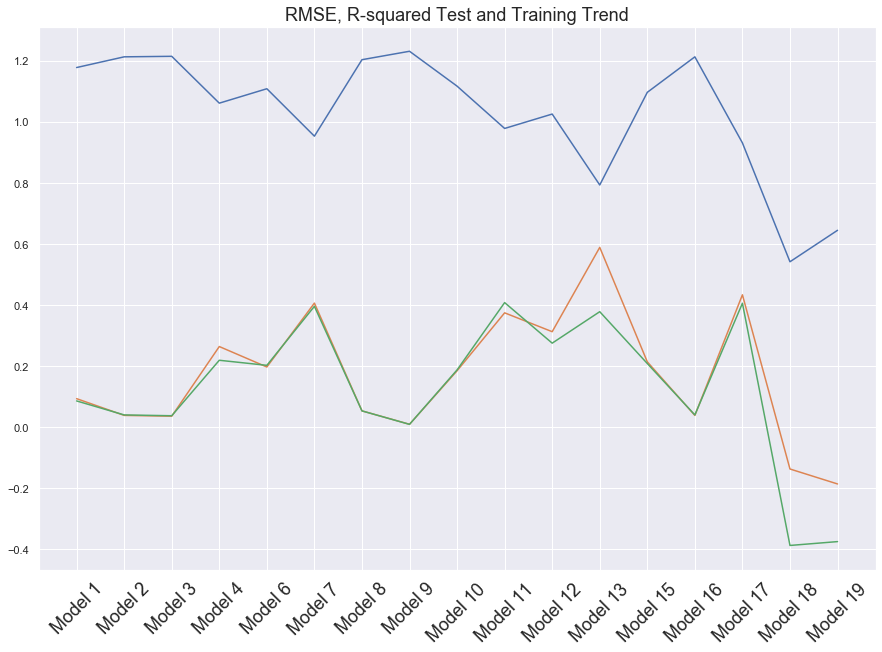

In [147]:
x = summary["Root Mean Squared Error (RMSE)"]
y = summary["R-squared (training)"]
z = summary["R-squared (test)"]
a = summary["Model"]
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(figsize=(15,10))


plt.plot(a,x)
plt.plot(a,y)
plt.plot(a,z)

ax.set_xticklabels(a, rotation=45, fontsize=18)

plt.title("RMSE, R-squared Test and Training Trend", fontsize=18);

plt.show()